# Exercise #4:  
Develop a finite difference discretization for 

$$u''(x)=f(x), \ \ \ u(0)=\alpha, \ \ u(1)=\beta$$ 

that uses $U_{i-2},U_{i-1},U_i,U_{i+1},U_{i+2}$. What order of accuracy can be achieved with these values?  At the boundaries, you will need additional values $U_{-1}$ and $U_{m+2}$; assume that they are equal to $\alpha, \beta$ respectively. Write a function to set up the matrix $A$ corresponding to this method.  How do the eigenvalues and eigenvectors of this matrix compare to those of the tridiagonal matrix discussed in class? By computing the eigenvalues of $A$ for different values of $m$, try to determine whether this method is stable.  

### Solution:

Let us constract interpolation polynomial:
$$p(x) = a_0 + a_1 (x-x_0) + a_2 (x-x_0)^2 +a_3(x-x_0)^3+a_4(x-x_0)^4$$
Now we need to solve a system:
\begin{align}
a_0 + a_1(-2h) + a_2 (-2h)^2+a_3(-2h)^3+a_4(-2h)^4  & = f_1\\
a_0 + a_1(-h) + a_2 (-h)^2+a_3(-h)^3+a_4(-h)^4  & = f_2 \\
a_0 + a_1(0) + a_2 (0)^2+a_3(0)^3+a_4(0)^4 & = f_3 \\
a_0 + a_1(h) + a_2 (h)^2+a_3(h)^3+a_4(h)^4 & = f_4 \\
a_0 + a_1(2h) + a_2 (2h)^2+a_3(2h)^3+a_4(2h)^4 & = f_5 \\
\end{align}


Solving this system we get: 
    \begin{align}
    a_0 &= f_3\\
    a_1 &= \frac{f_{1}-8 f_{2}+8 f_{4}-f_{5}}{12 h}\\
    a_2 &= \frac{-f_{1}+16 f_{2}-30 f_{3}+16 f_{4}-f_{5}}{24 h^{2}}\\
    a_3 &= \frac{-f_{1}+2 f_{2}-2 f_{4}+f_{5}}{12 h^{3}}\\
    a_4 &= \frac{f_{1}-4 f_{2}+6 f_{3}-4 f_{4}+f_{5}}{24 h^{4}}
    \end{align}

For the second derivative we will use the following scheme:
    $$D_2 = \frac{-U_{i-2}+16 U_{i-1}-30 U_{i} +16 U_{i+1}-U_{i+2}}{12 h^{2}}$$

Let us find the accuracy of this scheme:
    \begin{align}
    D_2 = \frac{1}{12h^2}\left(-\left(
f(x)-2 h f^{\prime}(x)+2 h^{2} f^{\prime \prime}(x)-\frac{4}{3} h^{3} f^{(3)}(x)+\frac{2}{3} h^{4} f^{(4)}(x)-\frac{4}{15} h^{5} f^{(5)}(x)+\frac{4}{45} h^{6} f^{(6)}(x)\right)-\left(
f(x)+2 h f^{\prime}(x)+2 h^{2} f^{\prime \prime}(x)+\frac{4}{3} h^{3} f^{(3)}(x)+\frac{2}{3} h^{4} f^{(4)}(x)+\frac{4}{15} h^{5} f^{(5)}(x)+\frac{4}{45} h^{6} f^{(6)}(x)\right)+\left(16 f(x)-16 h f^{\prime}(x)+8 h^{2} f^{\prime \prime}(x)-\frac{8}{3} h^{3} f^{(3)}(x)+\frac{2}{3} h^{4} f^{(4)}(x)-\frac{2}{15} h^{5} f^{(5)}(x)+\frac{1}{45} h^{6} f^{(6)}(x)\right)+\left(16 f(x)+16 h f^{\prime}(x)+8 h^{2} f^{\prime \prime}(x)+\frac{8}{3} h^{3} f^{(3)}(x)+\frac{2}{3} h^{4} f^{(4)}(x)+\frac{2}{15} h^{5} f^{(5)}(x)+\frac{1}{45} h^{6} f^{(6)}(x)\right) +\left(-30 f(x)\right)\right) = \frac{1}{12h^2}\left( 12 h^{2} f^{\prime \prime}(x)-\frac{2}{15} h^{6} f^{(6)}(x)\right) = f^{\prime \prime}(x)+O(h^4)
    \end{align}

We get accuracy of order 4.

Let us constract a matrix:
    $$A=\frac{1}{12h^{2}}\left[\begin{array}{cccccc}
-30 & 16 & -1& & & \\
16 & -30 & 16 &-1 & & \\
-1& 16 & -30 & 16 & -1 & \\
\ldots& \ldots& \ldots& \ldots& \ldots &\ldots\\
& -1& 16& -30& 16 &-1\\
& & -1& 16 & -30 & 16 \\
& & & -1& 16 & -30
\end{array}\right]$$

Analytical solution of eigenvalues for this matrix is more complicated that for tridiagonal matrix.

Let us implement the functions.

In [1]:
import numpy as np

In [2]:
from scipy.sparse import diags
from numpy import linalg as LA

In [3]:
def get_matrix_old(m):
    k = np.array([1.0*np.ones(m-1),-2.0*np.ones(m),1.0*np.ones(m-1)])
    offset = [-1,0,1]
    A = diags(k,offset).toarray()
    return A

In [4]:
get_matrix_old(10)

array([[-2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1., -2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1., -2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1., -2.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1., -2.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1., -2.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1., -2.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1., -2.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1., -2.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1., -2.]])

In [5]:
def get_matrix_new(m):
    
    k = np.array([-1.0*np.ones(m-2),16.0*np.ones(m-1),-30.0*np.ones(m),16.0*np.ones(m-1),-1.0*np.ones(m-2)])
    offset = [-2,-1,0,1,2]
    A = diags(k,offset).toarray()
    return A

In [6]:
get_matrix_new(10)

array([[-30.,  16.,  -1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [ 16., -30.,  16.,  -1.,   0.,   0.,   0.,   0.,   0.,   0.],
       [ -1.,  16., -30.,  16.,  -1.,   0.,   0.,   0.,   0.,   0.],
       [  0.,  -1.,  16., -30.,  16.,  -1.,   0.,   0.,   0.,   0.],
       [  0.,   0.,  -1.,  16., -30.,  16.,  -1.,   0.,   0.,   0.],
       [  0.,   0.,   0.,  -1.,  16., -30.,  16.,  -1.,   0.,   0.],
       [  0.,   0.,   0.,   0.,  -1.,  16., -30.,  16.,  -1.,   0.],
       [  0.,   0.,   0.,   0.,   0.,  -1.,  16., -30.,  16.,  -1.],
       [  0.,   0.,   0.,   0.,   0.,   0.,  -1.,  16., -30.,  16.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,  -1.,  16., -30.]])

Let us compare eigenvalues and eigenvectors of two approaches for $m = 10$:

In [7]:
w_new, v_new = LA.eig((10+1)*(10+1)/12*get_matrix_new(10))

In [8]:
w_old, v_old = LA.eig((10+1)*(10+1)/12*get_matrix_old(10))

In [9]:
print(w_old,'\n',w_new)

[ -0.8168917   -3.20138709  -6.96030853 -11.78913057 -17.29665076
 -23.03668257 -39.51644163 -37.13194625 -33.3730248  -28.54420276] 
 [-629.36416701 -583.4315441  -513.08574132 -426.42690962 -332.69193222
 -240.8053389  -158.23168523  -10.14557633  -40.45980756  -90.35729772]


In [10]:
print(v_old,'\n',v_new)

[[ 0.12013117 -0.23053002  0.3222527   0.38786839 -0.42206128 -0.42206128
  -0.12013117 -0.23053002 -0.3222527   0.38786839]
 [ 0.23053002 -0.38786839  0.42206128  0.3222527  -0.12013117  0.12013117
   0.23053002  0.38786839  0.42206128 -0.3222527 ]
 [ 0.3222527  -0.42206128  0.23053002 -0.12013117  0.38786839  0.38786839
  -0.3222527  -0.42206128 -0.23053002 -0.12013117]
 [ 0.38786839 -0.3222527  -0.12013117 -0.42206128  0.23053002 -0.23053002
   0.38786839  0.3222527  -0.12013117  0.42206128]
 [ 0.42206128 -0.12013117 -0.38786839 -0.23053002 -0.3222527  -0.3222527
  -0.42206128 -0.12013117  0.38786839 -0.23053002]
 [ 0.42206128  0.12013117 -0.38786839  0.23053002 -0.3222527   0.3222527
   0.42206128 -0.12013117 -0.38786839 -0.23053002]
 [ 0.38786839  0.3222527  -0.12013117  0.42206128  0.23053002  0.23053002
  -0.38786839  0.3222527   0.12013117  0.42206128]
 [ 0.3222527   0.42206128  0.23053002  0.12013117  0.38786839 -0.38786839
   0.3222527  -0.42206128  0.23053002 -0.12013117]
 [

Let us compare the $\min_p|\lambda_p|$ for both methods:

In [11]:
print(min(w_old,key=abs),min(w_new,key=abs))

-0.8168916987743011 -10.14557632931385


The new scheme seems more stable. 

Let us check this method for different values of $m$:

In [12]:
from tqdm import tqdm
list_of_mins = []
for m in tqdm([5,10,20,50,100,500,1000,3000,5000]):
    w, v = LA.eig((m+1)*(m+1)/(12)*get_matrix_new(m))
    list_of_mins.append(min(w,key=abs))

100%|██████████| 9/9 [03:31<00:00, 59.33s/it]


In [13]:
print(list_of_mins)

[-10.346917944974356, -10.14557632931385, -10.015624012080984, -9.929686427573378, -9.899899821033554, -9.87570229901041, -9.872655716520097, -9.87062202101252, -9.870215036852365]


Let us make a plot:

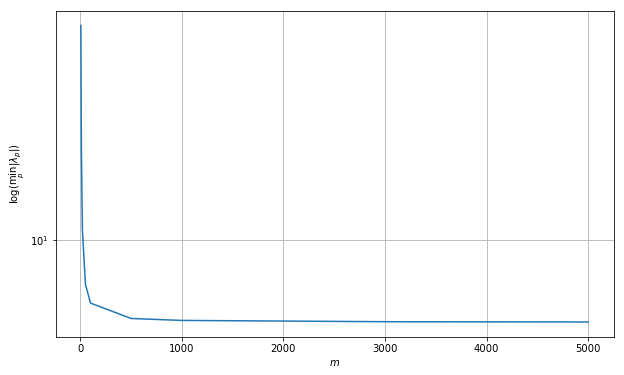

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
new_list = []
for obj in list_of_mins:
    new_list.append(abs(obj))
plt.plot([5,10,20,50,100,500,1000,3000,5000],new_list)
plt.yscale('log')
plt.xlabel('$m$')
plt.ylabel('$\log (\min_p \|\lambda_p\|)$')
plt.grid()
plt.show()

As we can see if we increase the number m then the smallest in magnitude eigenvalue decreases. Accordingly, the stability decreases, I was able to reach the value of 5000, it is impossible to increase this value further, because there is no difference in eigenvalues, but it takes a lot of time to solve the problem.

# Exercise #5:  
Use the numerical discretization you developed in Exercise #4 to solve the BVP  

$$u''(x) = f(x), \ \ \ 0 \le x \le 1, \ \ \ \ \ \ u(0)=1 \ \ \ \ \ u(1)=3$$  

with  

$$f(x)=-20+\frac{1}{2}\phi''(x)\cos(\phi(x))-\frac{1}{2}(\phi'(x))^2\sin(\phi(x))$$  

where  

$$\phi(x)=20\pi x^3.$$  

The true solution is

$$u(x) = 1 + 12x - 10x^2 + \frac{1}{2}\sin(\phi(x)).$$

Compute an approximate solution for several values of $h$, and compute the rate of convergence you see using the max-norm, 2-norm, and 1-norm of the errors (be sure to use the grid function norms, defined on p. 252 of the text).

### Solution:

Let us implement some functions:

In [16]:
def phi(x):
    res = 20*np.pi*x*x*x
    return res
def d_phi(x):
    res = 3*20*np.pi*x*x
    return res
def d_d_phi(x):
    res = 2*3*20*np.pi*x
    return res
def f(x):
    res = -20+0.5*d_d_phi(x)*np.cos(phi(x))-0.5*(d_phi(x)*d_phi(x))*np.sin(phi(x))
    return res

In [17]:
def u(x):
    res = 1.0+12.0*x-10.0*x*x+0.5*np.sin(phi(x))
    return res

We are going to solve linear system with the following parameters:
$$Ax=b,$$
where 
$$A=\frac{1}{12h^{2}}\left[\begin{array}{cccccc}
-30 & 16 & -1& & & \\
16 & -30 & 16 &-1 & & \\
-1& 16 & -30 & 16 & -1 & \\
\ldots& \ldots& \ldots& \ldots& \ldots &\ldots\\
& -1& 16& -30& 16 &-1\\
& & -1& 16 & -30 & 16 \\
& & & -1& 16 & -30
\end{array}\right]$$
and 
$$b = \begin{pmatrix}
f(h) - \frac{15\alpha}{12h^2}\\
f(2h) - \frac{\alpha}{12h^2}\\
\ldots\\
f(ih)\\
\ldots\\
f((m-1)h) - \frac{\beta}{12h^2}\\
f(mh) - \frac{15\beta}{12h^2}\\
\end{pmatrix}$$

In [110]:
def solver(m):
    h = 1/(m+1)
    A = (1/(12*h*h))*get_matrix_new(m)
    b = list(range(m))
    true_f = list(range(m))
    for i in range(m):
        if i == 0:
            b[0] = f(h) - 15/(12*h*h)
        if i == 1:
            b[1] = f(2*h) - 1/(12*h*h)
        if (i>=2) and (i<=m-2):
            b[i] = f(i*h)
        if i == m-1:
            b[m-2] = f((m-1)*h) - 3/(12*h*h)
        if i == m:
            b[m-1] = f(m*h) - 45/(12*h*h)
        true_f[i] = u(i*h)
    x = LA.solve(A,b)
    error = np.abs(np.dot(A,x) - true_f)
    return error

        

In [113]:
m_list = [5,10,20,50,100,500,1000]
l_2_list = []
l_1_list = []
l_inf_list = []
for m in tqdm(m_list):
    cur_res = solver(m)
    l_2_list.append( np.sqrt((1/(m+1))*sum(map(lambda x:x*x,cur_res))))
    l_1_list.append((1/(m+1)*sum(cur_res)))
    l_inf_list.append(max(cur_res))
    
    
    

100%|██████████| 7/7 [00:00<00:00, 91.66it/s]


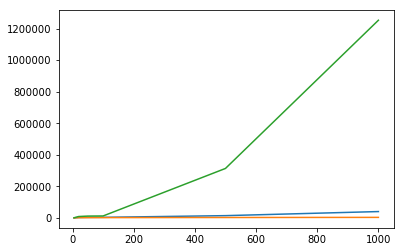

In [114]:
plt.plot(m_list, l_2_list)
plt.plot(m_list, l_1_list)
plt.plot(m_list, l_inf_list)
plt.show()

For some reason these method cannot have convergence. I checked my code many times. I would be thankful if you help me to find the mistake.

# Exercise #6 

*pencil and paper, no computation*

*This is an exercise in clear mathematical thinking and writing.  Most of the work has already been done for you in the text and the lectures.  Your goal is to produce a correctly written proof of the result, in your own words.  Be sure to state your reasoning carefully and precisely.*

Prove that the 3-point centered finite difference discretization of

$$u''(x) = f(x) \ \ \ 0 \le x \le 1 \ \ \ u(0)=\alpha \ \ \ u(1)=\beta$$

is convergent of order two in the 2-norm.  You may proceed as follows:

1) Show that the 3-point centered difference approximation of the second derivative is consistent, and write the leading truncation error term (you don't need to derive it).  
2) Show that the 2-norm of the discretization matrix $A$ is well-behaved as $h\to 0$ (i.e., the method is stable).  You can use the expressions for the eigenvalues of $A$ given in the book (no need to derive them).  
3) Use these two results to show that the global error is $O(h^2)$ as $h \to 0$.

**Proof**

The idea of the proof that 3-point centered finite difference discretization is convergent of order two in the 2-norm is pretty simple. We first compute the local truncation error of the method and show that the leading truncation error term is $O(h^2)$, Then we use 2-norm of stability to show that the global error can be bounded in terms of the local error. Finally we utilize fundamental theorem of finite difference methods and show that global error is $O(h^2)$ and the whole method s convergent of order two in the 2-norm.

1)We say that a method is consistent with the differential equation and boundary conditions if 

$$\left\|\tau^{h}\right\| \rightarrow 0 \text { as } h \rightarrow 0.$$

We will use Taylor series expansion, which means that if we get $\left\|\tau^{h}\right\| = O(h^p)$ for some $p>0$, then the method is consistent. In our case let us show that $p=2.$ For fixed $h$ let us define $\tau^{h}_i$:
$$\tau_{j}=\frac{1}{h^{2}}\left(u\left(x_{j-1}\right)-2 u\left(x_{j}\right)+u\left(x_{j+1}\right)\right)-f\left(x_{j}\right).$$
As it was shown previously and we do not need to derive we can just write the leading truncation error term:

\begin{align}
\tau_{j}&=\left[u^{\prime \prime}\left(x_{j}\right)+\frac{1}{12} h^{2} u^{\prime \prime \prime \prime}\left(x_{j}\right)+O\left(h^{4}\right)\right]-f\left(x_{j}\right)\\
\tau_{j}&=\frac{1}{12} h^{2} u^{\prime \prime \prime \prime}\left(x_{j}\right)+O\left(h^{4}\right)
\end{align}
Although $u^{\prime \prime \prime \prime}\left(x_{j}\right)$ is in general unknown, it is some fixed function independent of $h$, finally we have 
$$\tau_{j}=O\left(h^{2}\right) \text { as } h \rightarrow 0.$$ 
We can define $\tau$ to be the vector with components 􏰊$\tau_j$, then we have 
$$\tau=A \hat{U}-F$$
So we have 
$$\left\|\tau^{h}\right\| = O(h^2)$$

2) To get convergence we need to establish stability. Let us define this concept. Suppose a finite difference method for a linear BVP gives a sequence of matrix equations of the form $A^hU^h = F^h$, where $h$ is the mesh width. We say that the method is stable if $(A^h)^{-􏰀1}$ exists for all $h$ sufficiently small (for $h < h_0$, say) and if there is a constant $C$, independent of $h$, such that
$$\left\|\left(A^{h}\right)^{-1}\right\| \leq C \text { for all } h<h_{0}.$$

Let us consider the matrix of our method:
$$A=\frac{1}{h^{2}}\left[\begin{array}{cccccc}
-2 & 1 & & & & \\
1 & -2 & 1 & & & \\
& 1 & -2 & 1 & & \\
& & \ddots & \ddots & \ddots & \\
& & & 1 & -2 & 1 \\
& & & & 1 & -2
\end{array}\right]$$

Since the matrix $A$ is symmetric, the 2-norm of A is equal to its spectral radius:

$$\|A\|_{2}=\rho(A)=\max _{1 \leq p \leq m}\left|\lambda_{p}\right|$$

The matrix $A^{-􏰀1}$ is also symmetric, we can calculate the eigenvalues of $A^{-􏰀1}$ using eigenvalues of $A$, so
$$\left\|A^{-1}\right\|_{2}=\rho\left(A^{-1}\right)=\max _{1 \leq p \leq m}\left|\left(\lambda_{p}\right)^{-1}\right|=\left(\min _{1 \leq p \leq m}\left|\lambda_{p}\right|\right)^{-1}.$$

It was shown in textbook that 
$$\lambda_{p}=\frac{2}{h^{2}}(\cos (p \pi h)-1) \text { for } p=1,2, \ldots, m.$$
This means that the smallest eigenvalue of A is
\begin{align}
\lambda_{1} &=\frac{2}{h^{2}}(\cos (\pi h)-1) \\
&=\frac{2}{h^{2}}\left(-\frac{1}{2} \pi^{2} h^{2}+\frac{1}{24} \pi^{4} h^{4}+O\left(h^{6}\right)\right) \\
&=-\pi^{2}+O\left(h^{2}\right)
\end{align}
This is clearly bounded away from zero as $h \rightarrow 0$, and so we see that the method is stable in the 2-norm.

3)Let us look at the discrete system:
$$A^{h} E^{h}=-\tau^{h}$$

Let $\left(A^{h}\right)^{-1}$ be the inverse of this matrix. Then solving the system gives
$$E^{h}=-\left(A^{h}\right)^{-1} \tau^{h}$$
It leads to
\begin{align}
\left\|E^{h}\right\| &=\left\|\left(A^{h}\right)^{-1} \tau^{h}\right\| \\
& \leq\left\|\left(A^{h}\right)^{-1}\right\|\left\|\tau^{h}\right\| .
\end{align}

We have shown that $\left\|\left(A^{h}\right)^{-1}\right\| \leq C \text { for all } h<h_{0}$ and we have shown that $\left\|\tau^{h}\right\| = O(h^2)$. Using these results we have 
$$\left\|E^{h}\right\| \leq\left\|\left(A^{h}\right)^{-1}\right\|\left\|\tau^{h}\right\| \leq C\left\|\tau^{h}\right\| \rightarrow 0 \text { as } h \rightarrow 0$$
And the global error ($O(h^2)$) is the same as the local error because of stability.